In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Define the file path
file_path = r'C:/Users/jhyang/OneDrive/文档/GitHub_Projects/MSE_760/Lab3-Assignment/Problem_2-1/prall.txt'

# Load the data and skip the header row if it exists
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1, 
                   names=['Temperature', 'Pressure', 'Volume', 'Energy'])

C:\Users\jhyang\AppData\Local\Temp\ipykernel_22716\4170716334.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1,


Melting Temperature during Heating: 1271.77595335624 K
Melting Temperature during Cooling: 1094.85318642092 K


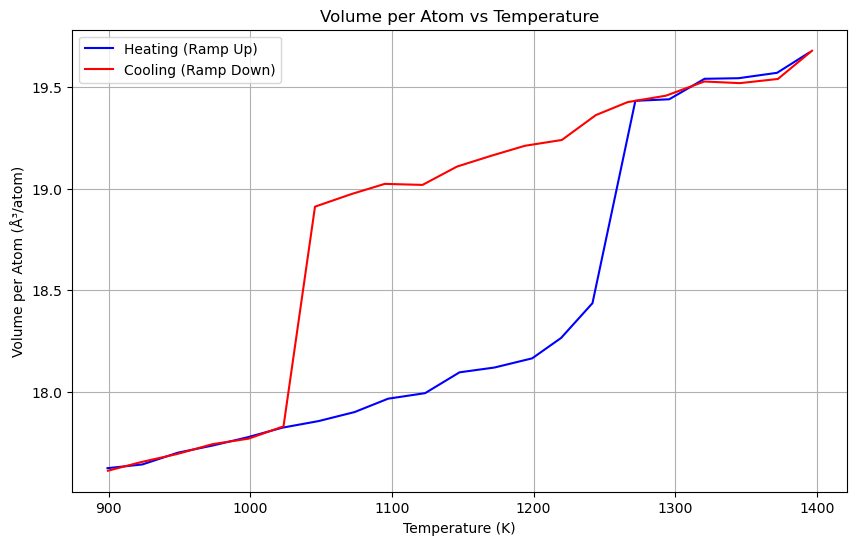

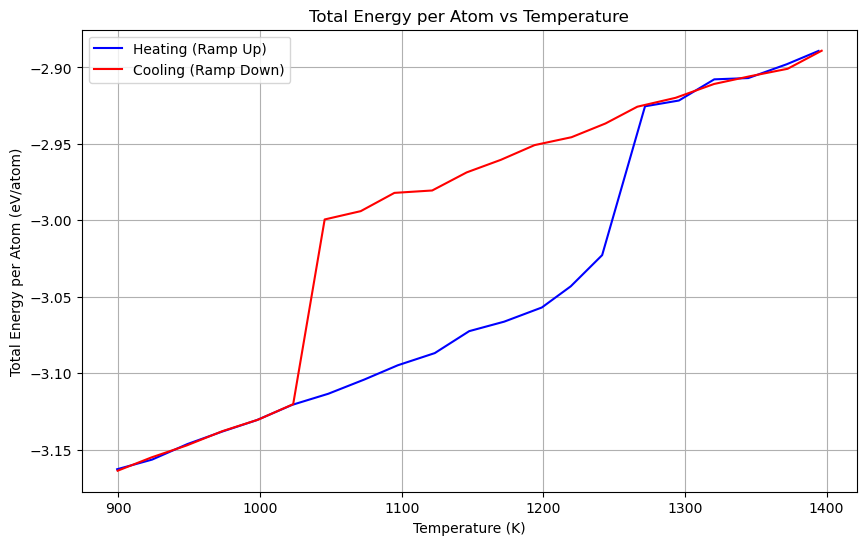

In [15]:
# Convert Volume and Energy to per atom values (assuming 32 atoms in simulation)
data['Volume_per_atom'] = data['Volume'] / 32
data['Energy_per_atom'] = data['Energy']

# Separate heating (ramp-up) and cooling (ramp-down) data
# Assuming the data is ordered such that the first half is ramp-up and the second half is ramp-down
mid_index = len(data) // 2
heating_data = data[:mid_index]
cooling_data = data[mid_index:]

# Identify melting temperature by finding the largest difference in energy for each phase
heating_temp_melt = heating_data['Temperature'][heating_data['Energy_per_atom'].diff().idxmax()]
cooling_temp_melt = cooling_data['Temperature'][cooling_data['Energy_per_atom'].diff().idxmax()]

# Print the melting temperatures
print(f"Melting Temperature during Heating: {heating_temp_melt} K")
print(f"Melting Temperature during Cooling: {cooling_temp_melt} K")

# Plot Volume per atom vs Temperature
plt.figure(figsize=(10, 6))
plt.plot(heating_data['Temperature'], heating_data['Volume_per_atom'], label='Heating (Ramp Up)', color='blue')
plt.plot(cooling_data['Temperature'], cooling_data['Volume_per_atom'], label='Cooling (Ramp Down)', color='red')
plt.xlabel('Temperature (K)')
plt.ylabel('Volume per Atom (Å³/atom)')
plt.title('Volume per Atom vs Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Plot Energy per atom vs Temperature
plt.figure(figsize=(10, 6))
plt.plot(heating_data['Temperature'], heating_data['Energy_per_atom'], label='Heating (Ramp Up)', color='blue')
plt.plot(cooling_data['Temperature'], cooling_data['Energy_per_atom'], label='Cooling (Ramp Down)', color='red')
plt.xlabel('Temperature (K)')
plt.ylabel('Total Energy per Atom (eV/atom)')
plt.title('Total Energy per Atom vs Temperature')
plt.legend()
plt.grid(True)
plt.show()